# Hackathon ViladeHack 2022

![](2022-03-26-09-50-38.png)
![](2022-03-26-09-50-09.png)

- Viladecans daily consumption 

	- DATA - Consumption registration date
	- TIPUS_CLIENT - Type of customer (commercial or industrial, in both cases it is non-domestic customers)
	- CONSUM_DIA - Accumulated consumption during the day in m3
	- NUM_CLIENT_ANONIMITZAT - Anonymised customer number
----  
- Monthly consumption Viladecans

	- DATA - Invoice date of consumption
	- NUM_IAE - IAE epigraph of economic activity of the business
	- TEXT_IAE - Descriptive text of the IAE epigraph
	- CONSUM_MES - Accumulated consumption during the two-month billing period (in m3)
	- NUM_CLIENT_ANONIMITZAT - Anonymised customer number

The monthly consumption dataset provides information on the type of economic activity of the customers.  
**The consumption information is not relevant in this dataset.**

## Libraries

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Import personal library
import Pers_lib as Pers

In [3]:
# settings to display all columns (default is 20, now is None (all))
pd.set_option("display.max_columns", None)

In [4]:
df_month = pd.read_csv('https://raw.githubusercontent.com/viladehack/Viladehack_DataScience/main/Consum_mensual_viladecans_2018_2022_clean.csv',
                       parse_dates=["DATA"], 
                       infer_datetime_format=True)
df_month.head()

,DATA,NUM_IAE,TEXT_IAE,CONSUM_MES,NUM_CLIENT_ANONIMITZAT
0,2018-04-01,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT,14,ODS25IEHI
1,2019-10-01,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT,29,ODS25IEHI
2,2019-12-01,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT,26,ODS25IEHI
3,2021-02-01,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT,0,ODS25IEHI
4,2021-10-01,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT,5,ODS25IEHI


In [5]:
df_day   = pd.read_csv('https://raw.githubusercontent.com/viladehack/Viladehack_DataScience/main/Consum_diari_viladecans_2018_2021.csv',
                       parse_dates=["DATA"], 
                       infer_datetime_format=True)
df_day.head()

,DATA,TIPUS_CLIENT,CONSUM,NUM_CLIENT_ANONIMITZAT
0,2018-01-24,COMERCIAL,0,ODS25IEHI
1,2018-01-03,COMERCIAL,0,ODS25IEHI
2,2018-01-28,COMERCIAL,20,ODS25IEHI
3,2018-01-19,COMERCIAL,31,ODS25IEHI
4,2018-01-18,COMERCIAL,31,ODS25IEHI


In [6]:
Pers.df_info(df_day)

[-------------------------SHAPE------------------------]


(802254, 4)

[-------------------------INFO-------------------------]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802254 entries, 0 to 802253
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATA                    802254 non-null  datetime64[ns]
 1   TIPUS_CLIENT            802254 non-null  object        
 2   CONSUM                  802254 non-null  int64         
 3   NUM_CLIENT_ANONIMITZAT  802254 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 24.5+ MB


None

[-----------------------DESCRIBE-----------------------]


,DATA,TIPUS_CLIENT,CONSUM,NUM_CLIENT_ANONIMITZAT
count,802254,802254,802254.00,802254
unique,NaN,2,NaN,1686
top,NaN,COMERCIAL,NaN,DBFEA0ILH
freq,NaN,726809,NaN,1460
mean,2021-01-10 23:47:17.508320,NaN,563.94,NaN
min,2018-01-01 00:00:00,NaN,-521870.00,NaN
25%,2020-10-01 00:00:00,NaN,0.00,NaN
50%,2021-03-21 00:00:00,NaN,30.00,NaN
75%,2021-08-12 00:00:00,NaN,167.00,NaN
max,2021-12-30 00:00:00,NaN,26307979.00,NaN


[------------------------NaN's-------------------------]


DATA                      0
TIPUS_CLIENT              0
CONSUM                    0
NUM_CLIENT_ANONIMITZAT    0
dtype: int64

[--------------Values in categorical variables---------]
------------------TIPUS_CLIENT-------------------
------------Unique Values--------------
Number of unique values is: 2
['COMERCIAL' 'INDUSTRIAL']
------------Value Counts--------------


COMERCIAL     726809
INDUSTRIAL     75445
Name: TIPUS_CLIENT, dtype: int64

------------------NUM_CLIENT_ANONIMITZAT-------------------
------------Unique Values--------------
Number of unique values is: 1686
['ODS25IEHI' 'DR0R23EW6' '1BZMYTGZV' ... 'TJJR395X6' '1S8FMJTA5'
 'G02DCTC9T']
------------Value Counts--------------


DBFEA0ILH    1460
X37Q8Y78Y    1460
FDOKN6MBB    1460
NI5UUCKQ7    1459
BBAVWOTEH    1459
             ... 
KH8FZ9JR2       9
3O5CMXQ4J       8
IWV8547XT       8
BKG05GCXO       6
F6N06NPVZ       6
Name: NUM_CLIENT_ANONIMITZAT, Length: 1686, dtype: int64

In [7]:
month =  df_month[["NUM_CLIENT_ANONIMITZAT", "NUM_IAE", "TEXT_IAE" ]]
month.head()

,NUM_CLIENT_ANONIMITZAT,NUM_IAE,TEXT_IAE
0,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
1,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
2,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
3,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
4,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT


In [8]:
month = month.drop_duplicates()

In [9]:
df = pd.merge(df_day, month, on=['NUM_CLIENT_ANONIMITZAT'])
df

,DATA,TIPUS_CLIENT,CONSUM,NUM_CLIENT_ANONIMITZAT,NUM_IAE,TEXT_IAE
0,2018-01-24,COMERCIAL,0,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
1,2018-01-03,COMERCIAL,0,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
2,2018-01-28,COMERCIAL,20,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
3,2018-01-19,COMERCIAL,31,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
4,2018-01-18,COMERCIAL,31,ODS25IEHI,I9429,ALTRES SERVEIS SANITARIS SENSE INTERNAT
...,...,...,...,...,...,...
928262,2021-12-12,COMERCIAL,3,G02DCTC9T,IXXXX,ACTIVITAT DESCONEGUDA
928263,2021-12-15,COMERCIAL,-1,G02DCTC9T,IXXXX,ACTIVITAT DESCONEGUDA
928264,2021-12-23,COMERCIAL,50,G02DCTC9T,IXXXX,ACTIVITAT DESCONEGUDA
928265,2021-12-27,COMERCIAL,101,G02DCTC9T,IXXXX,ACTIVITAT DESCONEGUDA


In [10]:
df.nunique()

DATA                       1460
TIPUS_CLIENT                  2
CONSUM                    13393
NUM_CLIENT_ANONIMITZAT     1686
NUM_IAE                     324
TEXT_IAE                    322
dtype: int64

In [11]:
df.TIPUS_CLIENT.unique()

array(['COMERCIAL', 'INDUSTRIAL'], dtype=object)

In [12]:
INDUSTRIAL_df = df[df["TIPUS_CLIENT"]=="INDUSTRIAL"]
INDUSTRIAL_df.head()

,DATA,TIPUS_CLIENT,CONSUM,NUM_CLIENT_ANONIMITZAT,NUM_IAE,TEXT_IAE
9965,2018-02-25,INDUSTRIAL,0,WIOKSIZFR,I9997,Sense activitat o desconeguda
9966,2018-02-11,INDUSTRIAL,0,WIOKSIZFR,I9997,Sense activitat o desconeguda
9967,2018-02-08,INDUSTRIAL,0,WIOKSIZFR,I9997,Sense activitat o desconeguda
9968,2018-02-01,INDUSTRIAL,0,WIOKSIZFR,I9997,Sense activitat o desconeguda
9969,2018-02-18,INDUSTRIAL,0,WIOKSIZFR,I9997,Sense activitat o desconeguda


In [13]:
INDUSTRIAL_df.nunique()

DATA                       1460
TIPUS_CLIENT                  1
CONSUM                    12381
NUM_CLIENT_ANONIMITZAT      131
NUM_IAE                      87
TEXT_IAE                     87
dtype: int64

In [14]:
df[df["NUM_IAE"]=="I9997"].nunique()

DATA                      1460
TIPUS_CLIENT                 2
CONSUM                    3132
NUM_CLIENT_ANONIMITZAT     301
NUM_IAE                      1
TEXT_IAE                     1
dtype: int64

<AxesSubplot:title={'center':'Consum 1 client per data'}, xlabel='DATA', ylabel='CONSUM'>

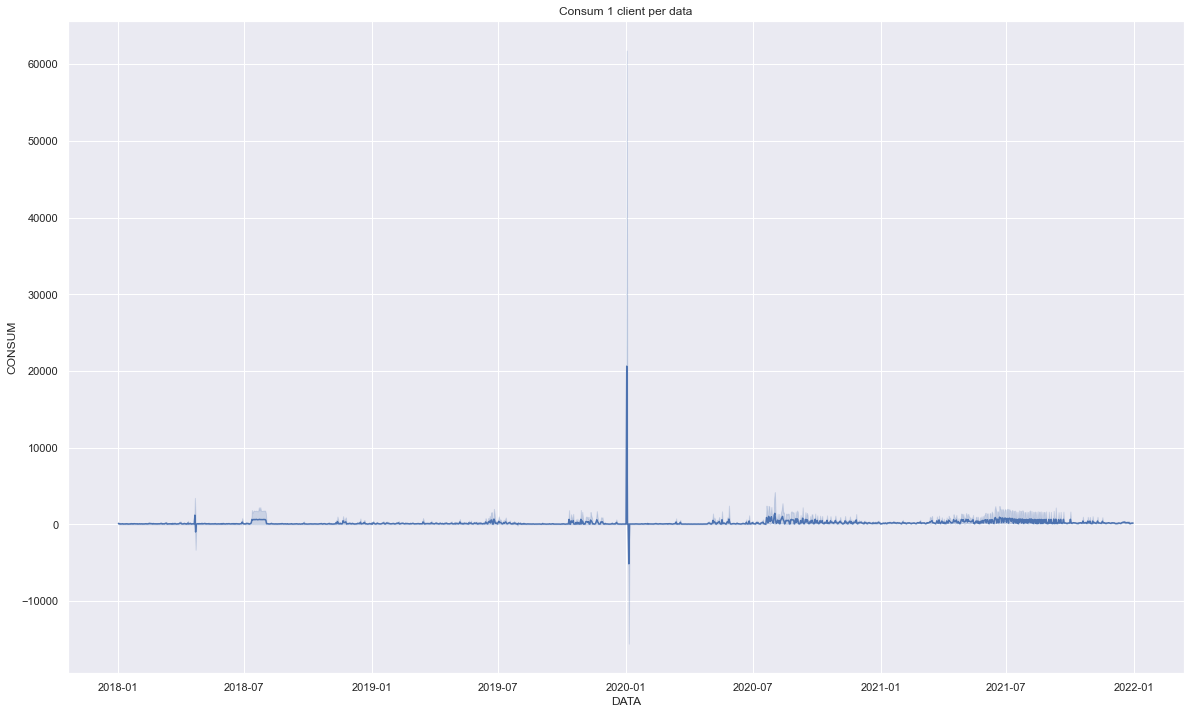

In [25]:
# Activate seaborn’s “default” theme
sns.set_theme()
fig, ax = plt.subplots(figsize=(20,12))
sTitle = 'Consum 1 client per data' 
ax.set_title(sTitle)
sns.lineplot(x="DATA", y="CONSUM",
            data=df[df["NUM_IAE"]=="I9997"]);

In [21]:
df[df['CONSUM'] == df[df["NUM_IAE"]=="I9997"].CONSUM.max()]

,DATA,TIPUS_CLIENT,CONSUM,NUM_CLIENT_ANONIMITZAT,NUM_IAE,TEXT_IAE
245099,2020-01-02,INDUSTRIAL,986903,L6QNWYNXA,I9997,Sense activitat o desconeguda


Here we see that there is a very big consumption on 1 day, but the rest of the dataset doesn't have this.
We consider that it's an outlier and we are going to remove it.

In [26]:
#Remove outliers of this client
df_I9997 = df[df["NUM_IAE"]=="I9997"]
df_I9997 = Pers.remove_outlier(df_I9997,'CONSUM')

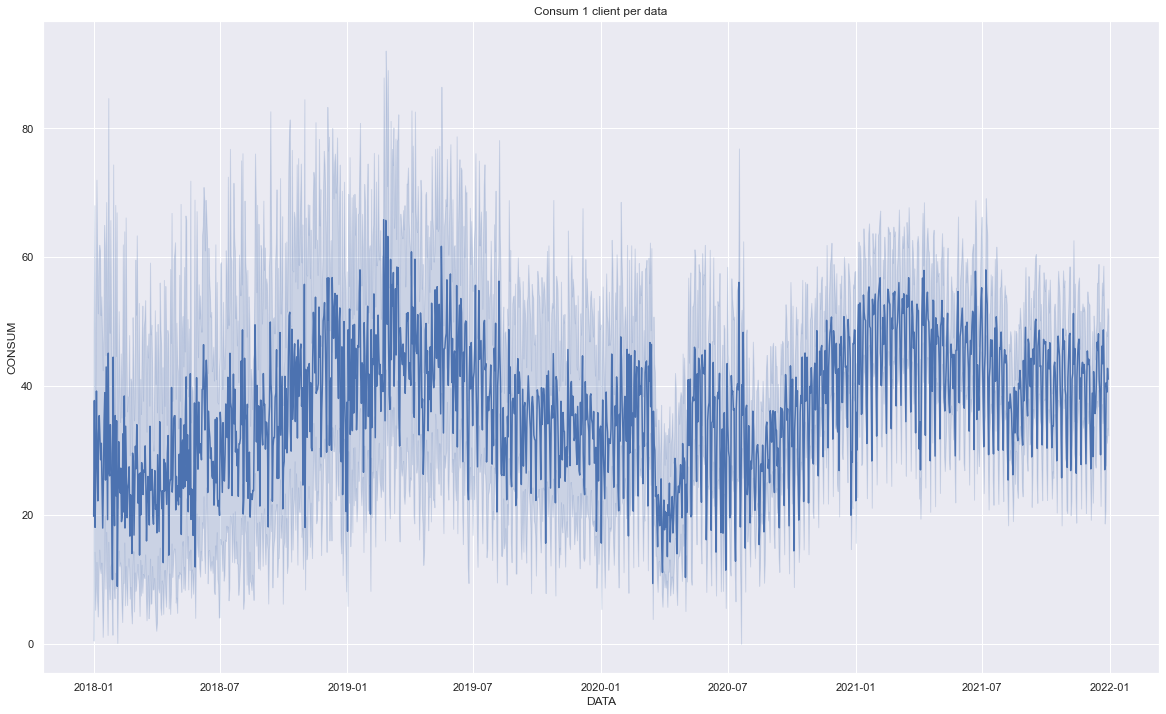

In [28]:
fig, ax = plt.subplots(figsize=(20,12))
sTitle = 'Consum 1 client per data' 
ax.set_title(sTitle)
sns.lineplot(x="DATA", y="CONSUM", data=df_I9997);

In [ ]:
COMERCIAL_df = df[df["TIPUS_CLIENT"]=="COMERCIAL"]

In [ ]:
COMERCIAL_df.nunique()

DATA                      1460
TIPUS_CLIENT                 1
CONSUM                    4602
NUM_CLIENT_ANONIMITZAT    1562
NUM_IAE                    290
TEXT_IAE                   288
dtype: int64

In [ ]:
df_comercial_consum = COMERCIAL_df.groupby('NUM_CLIENT_ANONIMITZAT').sum().sort_values(by='CONSUM')
df_comercial_consum = df_comercial_consum.reset_index()

### CLEANING

Let's first delete the columns we find non-relevant

## PREPROCESS DAILY DATASET
Lets's preprocess the daily dataset